Name: Emir Alper Yildiz

ID: 201101004

Course: BIL570 /BIL470

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sklM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from lineerRegression.py import lR

# Exploratory Data Analysis (EDA) for IRIS

In [4]:
dataset = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

#Gender column will not be used.
dataset.drop('Gender', axis=1, inplace=True)

<h3> DATASET SUMMARY!!

In [8]:
print("Info for dataset\n")
print(dataset.info())
print('='*30)

print("\nShape is: ", str(dataset.shape) + "\n")
print('='*30)

print("First five elements", end='')
display(dataset.head())
print('='*30)

print("\nNull values of table")
display(dataset.isnull().sum())
print('='*30)

print("\nGeneral info of dataset", end='')
display(dataset.describe())
print('='*30)

print("\nDuplicate values", end='')
dup_sum = dataset.duplicated().sum()
if(dup_sum == 0):
    print("\nThere is no duplicate values.")
else:
    display(dataset[dataset.duplicated()])
    display(dup_sum)

print('='*30)
print("\nFrequency of Index:\n" + dataset['Index'].value_counts().to_string())

Info for dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Height  500 non-null    int64
 1   Weight  500 non-null    int64
 2   Index   500 non-null    int64
dtypes: int64(3)
memory usage: 11.8 KB
None

Shape is:  (500, 3)

First five elements

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3



Null values of table


Height    0
Weight    0
Index     0
dtype: int64


General info of dataset

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000



Duplicate values

,Height,Weight,Index
20,157,110,5
162,192,101,3
187,182,84,3
197,177,117,4
260,159,104,5
310,171,147,5
321,181,111,4
327,167,85,4
334,157,56,2
347,162,58,2


24


Frequency of Index:
5    198
4    130
2     69
3     68
1     22
0     13


<h3>DATASET DISTRIBUTION

General distribution.


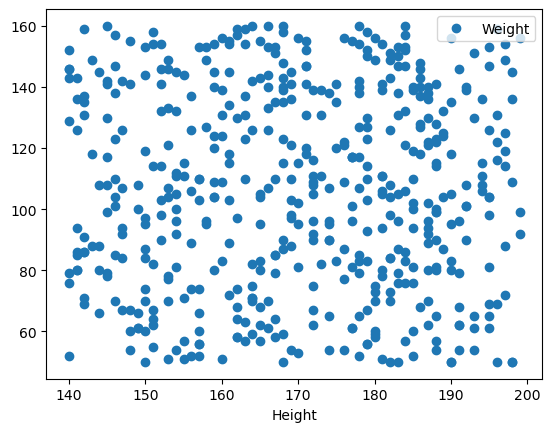

Distribution of features with index.


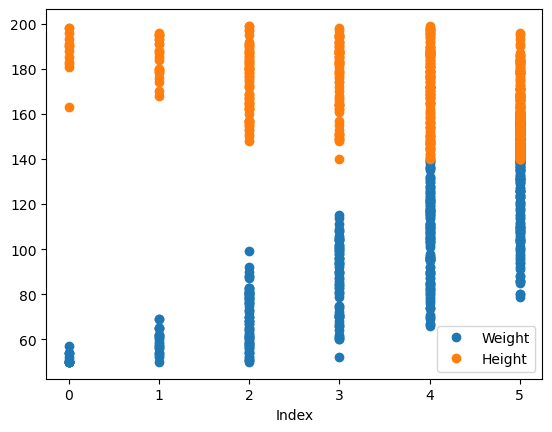

Distribution of features by itself.


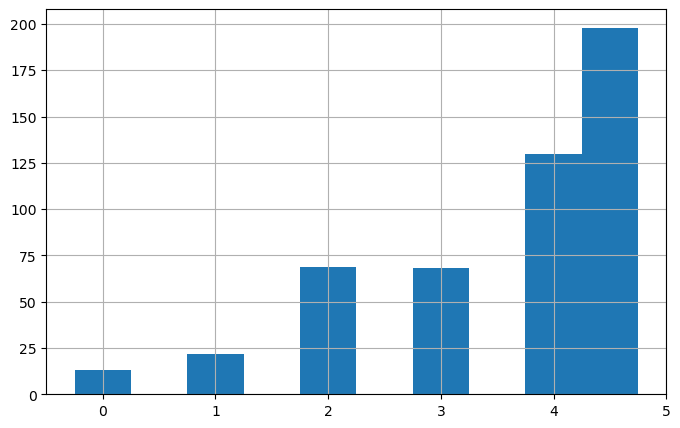

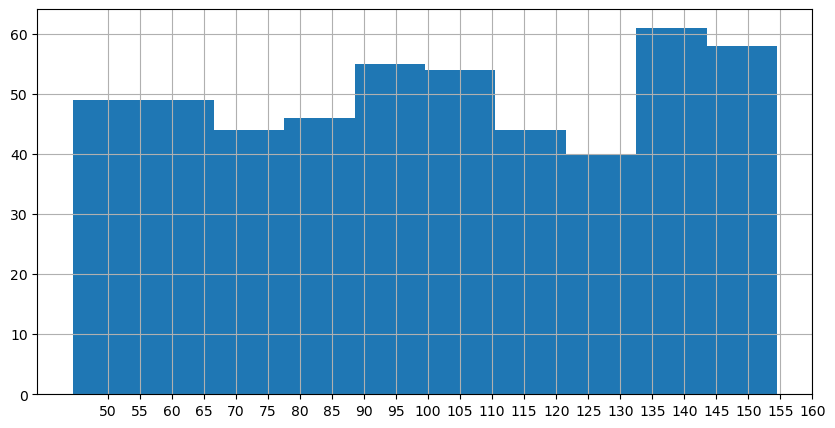

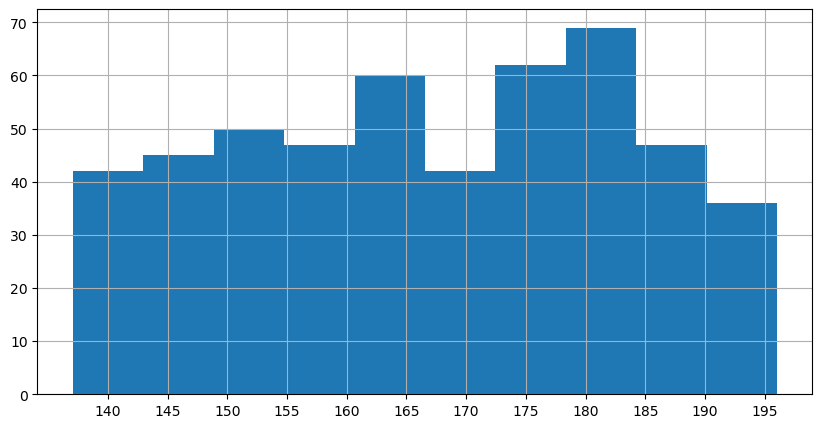

In [54]:
print("General distribution.")
dataset.plot(x='Height', y='Weight', style='o')
plt.show()

print("Distribution of features with index.")

dataset.plot(x='Index', y=['Weight', 'Height'], style='o')
plt.show()


print("Distribution of features by itself.")

dataset['Index'].hist(figsize=(8,5), align='left')
plt.xticks(np.arange(min(dataset['Index']), max(dataset['Index'])+1, 1.0))
plt.show()

############

dataset['Weight'].hist(figsize=(10,5), align='left')
plt.xticks(np.arange(min(dataset['Weight']), max(dataset['Weight'])+1, 5.0))
plt.show()

############

dataset['Height'].hist(figsize=(10,5), align='left')
plt.xticks(np.arange(min(dataset['Height']), max(dataset['Height'])+1, 5.0))
plt.show()

<h3> DATASET CORRELATION MATRIX

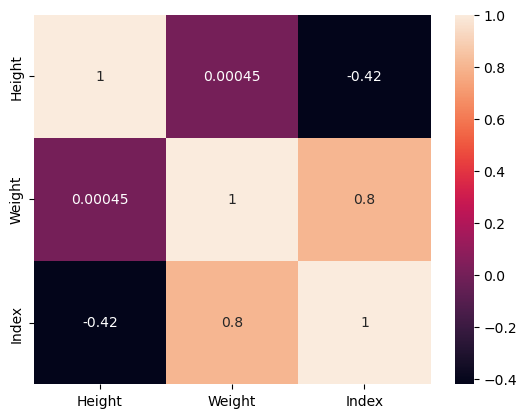

In [13]:
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

<h3> DATASET PAIR-PLOTS FOR FEATURES

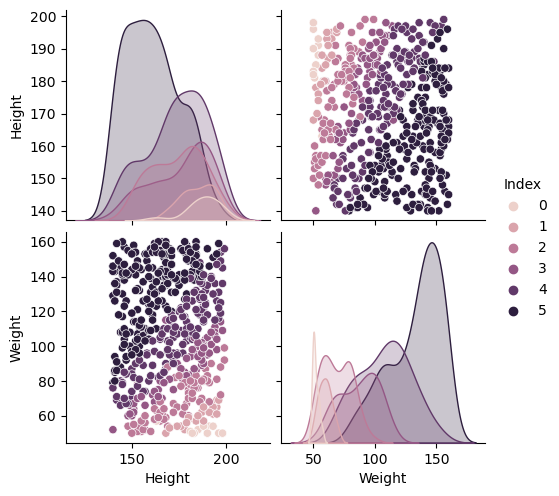

In [18]:
sns.pairplot(dataset, hue="Index")

# Train the classifier

In [6]:
clf = lineerRegression()

Split dataset to train and test

In [8]:
features=dataset.values.tolist()
height = []
weight = []
targets = []
for row in features:
    targets.append(int(row[2]))    
    del row[2]
    weight.append(int(row[1]))
    del row[1]
    height.append(int(row[0]))
    del row[0]
features=pd.Series(features)
targets=pd.Series(targets)
feature_train, feature_test, target_train, target_test = train_test_split(features, targets, test_size=0.5, shuffle=True)

feature_train_list=feature_train.values.tolist()
target_train_list=target_train.values.tolist()
feature_test_list=feature_test.values.tolist()
target_test_list=target_test.values.tolist()

### Train The Classifier

In [9]:
clf.fit(feature_train_list,target_train_list)

### Predict Class of Test values

In [10]:
target_predictions = clf.predict(feature_test_list)
print("Test Features Expected Classification")
print(target_test_list)
print("Prediction")
print(target_predictions);
check_predictions = clf.predict(feature_train_list)
print("Train Features Expected Classification")
print(target_train_list)
print("Prediction")
print(check_predictions);

Test Features Expected Classification
[1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0]
Prediction
[1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0]
Train Features Expected Classification
[1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2]
Prediction
[1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 

# Results

### Confusion Matrix of Test

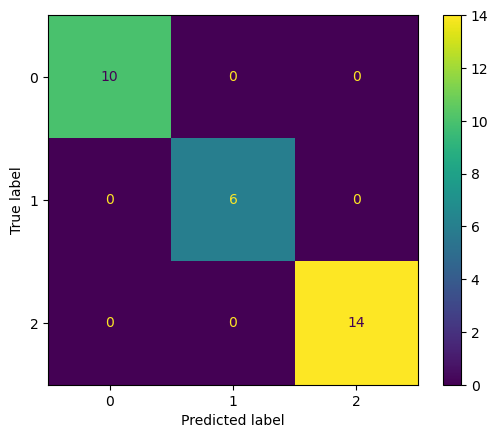

In [11]:
conf_matrix = sklM.confusion_matrix(target_test_list, target_predictions)
vis = sklM.ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
vis.plot()
plt.show()

### Confusion Matrix of Train

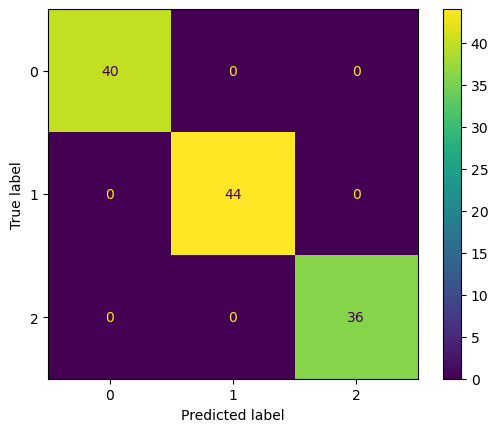

In [12]:
conf_matrix = sklM.confusion_matrix(target_train_list, check_predictions)
vis = sklM.ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
vis.plot()
plt.show()

### F1-Score

<h4>F1-Score of Test Data

In [13]:
print("Micro version:")
print(sklM.f1_score(target_test_list, target_predictions, average="micro"))

print("Macro version:")
print(sklM.f1_score(target_test_list, target_predictions, average="macro"))

print("Weighted version:")
print(sklM.f1_score(target_test_list, target_predictions, average="weighted"))

Micro version:
1.0
Macro version:
1.0
Weighted version:
1.0


<h4>F1-Score of Training Data

In [14]:
print("Micro version:")
print(sklM.f1_score(target_train_list, check_predictions, average="micro"))

print("Macro version:")
print(sklM.f1_score(target_train_list, check_predictions, average="macro"))

print("Weighted version:")
print(sklM.f1_score(target_train_list, check_predictions, average="weighted"))

Micro version:
1.0
Macro version:
1.0
Weighted version:
1.0


### Accuracy

<h4>Accuracy of Test Data

In [15]:
print("Accuracy: ", sklM.accuracy_score(target_test_list, target_predictions))

Accuracy:  1.0


<h4>Accuracy of Training Data

In [16]:
print("Accuracy: ", sklM.accuracy_score(target_train_list, check_predictions))

Accuracy:  1.0


### Precision

<h4>Precision of Test Data

In [17]:
print("Micro version:")
print(sklM.precision_score(target_test_list, target_predictions, average="micro"))

print("Macro version:")
print(sklM.precision_score(target_test_list, target_predictions, average="macro"))

print("Weighted version:")
print(sklM.precision_score(target_test_list, target_predictions, average="weighted"))

Micro version:
1.0
Macro version:
1.0
Weighted version:
1.0


<h4>Precision of Training Data

In [18]:
print("Micro version:")
print(sklM.precision_score(target_train_list, check_predictions, average="micro"))

print("Macro version:")
print(sklM.precision_score(target_train_list, check_predictions, average="macro"))

print("Weighted version:")
print(sklM.precision_score(target_train_list, check_predictions, average="weighted"))

Micro version:
1.0
Macro version:
1.0
Weighted version:
1.0


### Recall

<h4>Recall of Test Data

In [19]:
print("Micro version:")
print(sklM.recall_score(target_test_list, target_predictions, average="micro"))

print("Macro version:")
print(sklM.recall_score(target_test_list, target_predictions, average="macro"))

print("Weighted version:")
print(sklM.recall_score(target_test_list, target_predictions, average="weighted"))

Micro version:
1.0
Macro version:
1.0
Weighted version:
1.0


<h4>Recall of Training Data

In [20]:
print("Micro version:")
print(sklM.recall_score(target_train_list, check_predictions, average="micro"))

print("Macro version:")
print(sklM.recall_score(target_train_list, check_predictions, average="macro"))

print("Weighted version:")
print(sklM.recall_score(target_train_list, check_predictions, average="weighted"))

Micro version:
1.0
Macro version:
1.0
Weighted version:
1.0


### Plot of ROC Curve (Test/Train) and Value of AUC (Test/Train)

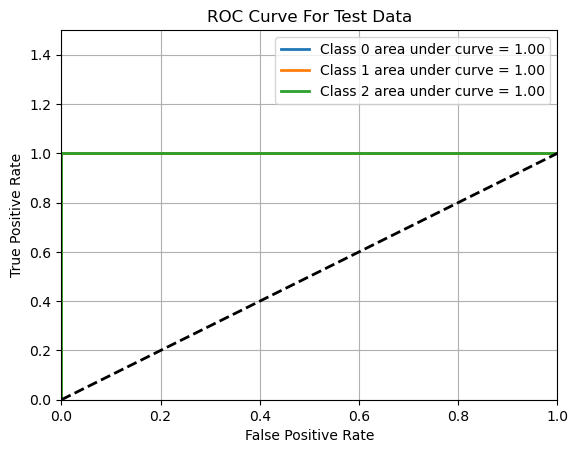

In [21]:
class_labels = [0, 1, 2]

target_bin_test, target_bin_predictions = [label_binarize(data, classes = class_labels) for data in [target_test_list, target_predictions]]


fpr_test = {}
tpr_test = {}

for i in class_labels:
    fpr_test[i], tpr_test[i], _ = sklM.roc_curve(target_bin_test[:, i], target_bin_predictions[:, i])

area_under_curve_test = [sklM.auc(fpr_test[i], tpr_test[i]) for i in class_labels]


for i in class_labels:
    color = plt.cm.tab10(i)
    label = f"Class {i} area under curve = {area_under_curve_test[i]:.2f}"
    plt.plot(fpr_test[i], tpr_test[i], color = color, lw = 2, label = label)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.5])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve For Test Data")
plt.legend()
plt.show()

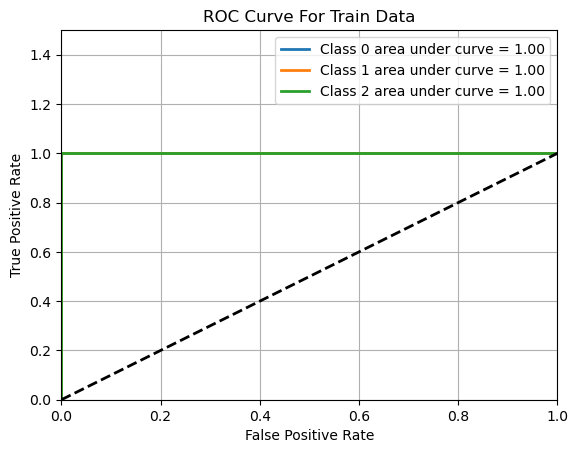

In [22]:
target_bin_train, target_bin_check = [label_binarize(data, classes = class_labels) for data in [target_train_list, check_predictions]]


fpr_train = {}
tpr_train = {}

for i in class_labels:
    fpr_train[i], tpr_train[i], _ = sklM.roc_curve(target_bin_train[:, i], target_bin_check[:, i])

area_under_curve_train = [sklM.auc(fpr_train[i], tpr_train[i]) for i in class_labels]


for i in class_labels:
    color = plt.cm.tab10(i)
    label = f"Class {i} area under curve = {area_under_curve_train[i]:.2f}"
    plt.plot(fpr_train[i], tpr_train[i], color = color, lw = 2, label = label)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.5])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve For Train Data")
plt.legend()
plt.show()

<h3>Analyze Of Results</h3>
<p>
&emsp;The model successfuly predict species of the flowers. It has %100 percent success rate with training data. Model's success rate is over %90 for test data most of the time.</br>
&emsp;The unexpected low success rate results may be caused by overfitting. But, for the maximum depth 5, generally high success rates are observed.</br>
&emsp;For training the model. I have used gini impurity. To find the optimal split of that node, I have checked every possible value of every feature. This has big time complexity but since the dataset is small, it does not cause any trouble for time. And it ensure the best split for that node.</br>
</p>

#### Ideal Depth for DT

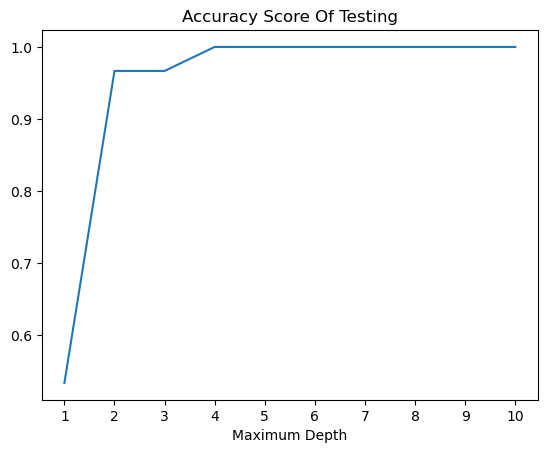

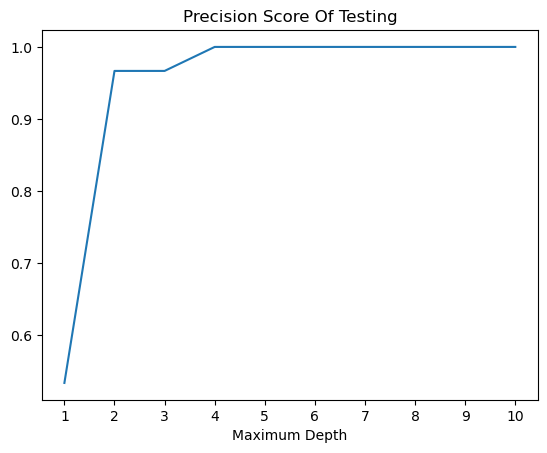

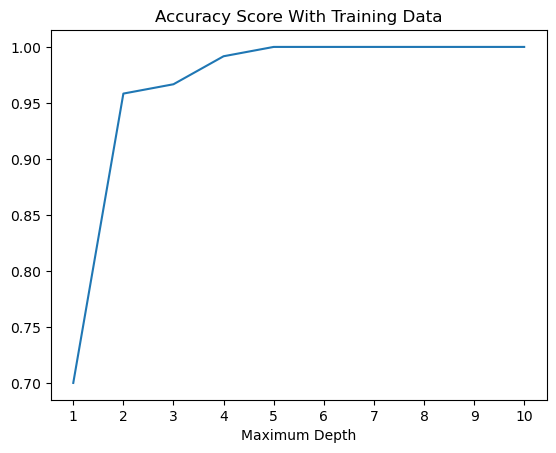

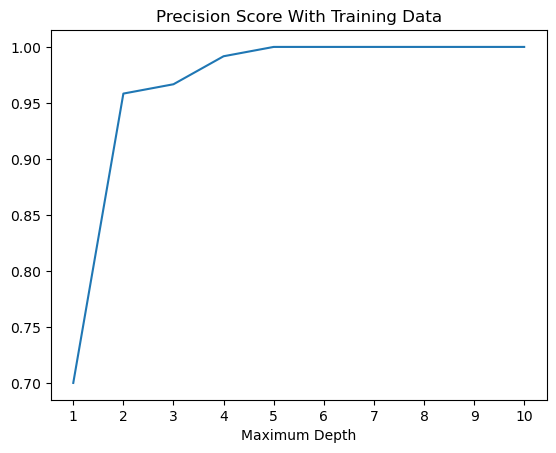

In [23]:
accuracy_score_of_predictions = []
accuracy_score_of_check = []
precision_score_of_predictions = []
precision_score_of_check = []

L = [1,2,3,4,5,6,7,8,9,10]
for i in L:
    clf2 = DecisionTreeClassifier(max_depth=i)
    clf2.fit(feature_train_list,target_train_list);
    target_predictions = clf2.predict(feature_test_list)
    check_predictions = clf2.predict(feature_train_list)
    
    accuracy_score_of_predictions.append(sklM.accuracy_score(target_test_list, target_predictions))
    precision_score_of_predictions.append(sklM.precision_score(target_test_list, target_predictions, average="micro"))
    
    accuracy_score_of_check.append(sklM.accuracy_score(target_train_list, check_predictions))
    precision_score_of_check.append(sklM.precision_score(target_train_list, check_predictions, average="micro"))

plt.plot(L, accuracy_score_of_predictions)
plt.xticks(L)
plt.xlabel("Maximum Depth")
plt.title("Accuracy Score Of Testing")
plt.show()

plt.plot(L, precision_score_of_predictions)
plt.xticks(L)
plt.xlabel("Maximum Depth")
plt.title("Precision Score Of Testing")
plt.show()

plt.plot(L, accuracy_score_of_check)
plt.xticks(L)
plt.xlabel("Maximum Depth")
plt.title("Accuracy Score With Training Data")
plt.show()

plt.plot(L, precision_score_of_check)
plt.xticks(L)
plt.xlabel("Maximum Depth")
plt.title("Precision Score With Training Data")
plt.show()

<h3>Analyze Of Results</h3>
<p>
&emsp;For depths below 2, result of fit function is expectedly bad. It has very low success rate both for test and training data.</br>
&emsp;From 2 to 5, maximum depth has overall good results. Model cannot reach %100 percent success rate for training data. But, test data have very promising success rate.</br>
&emsp;For maximum depth bigger than 5, we have risk of overfitting. It depends shuffle of original data but sometimes, success rate is dropping for test data. On the other hand, we reach %100 success rate for training date which is expected, but not the aim.</br>
&emsp;To reach maximum success rate, we can train five different models with the equally divided to 5 and shuffled data which 5 different pieces will be 5 different test data for one of the models.</br>
</p>